<a href="https://colab.research.google.com/github/sukh-coder30/Function/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


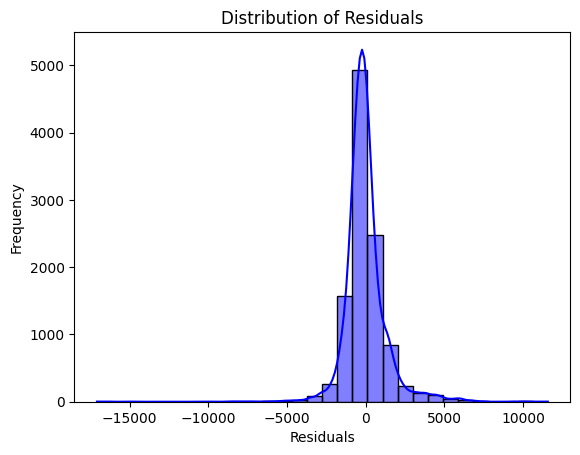

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(diamonds.head())

# Preprocessing: Convert categorical features to numerical (e.g., 'cut', 'color', 'clarity')
# Using LabelEncoder to encode categorical features
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Visualize the distribution of residuals
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Convert categorical features to numerical (e.g., 'cut', 'color', 'clarity')
# Using LabelEncoder to encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 1825912.99
Mean Absolute Error (MAE): 858.71
Root Mean Squared Error (RMSE): 1351.26


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

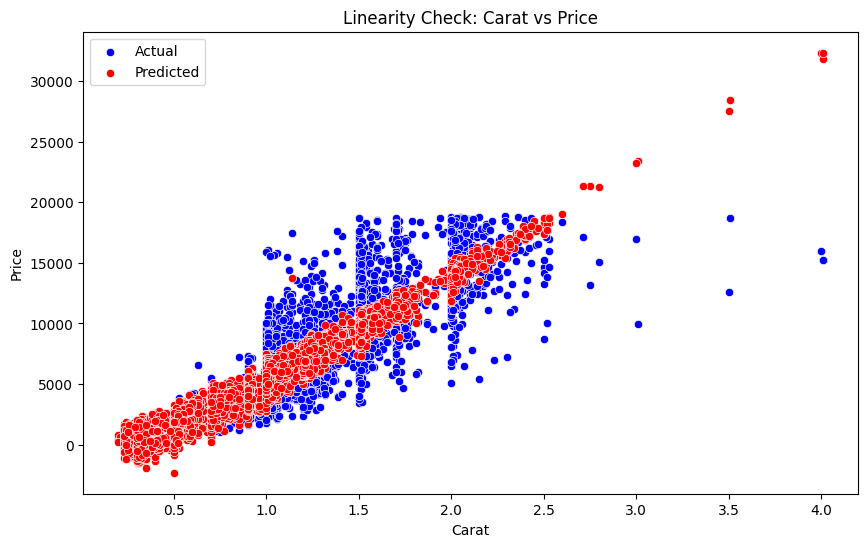

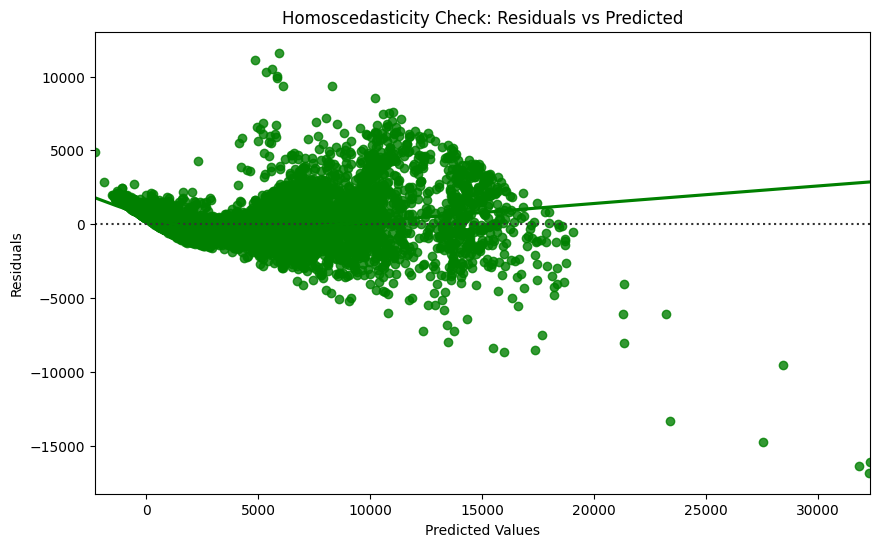

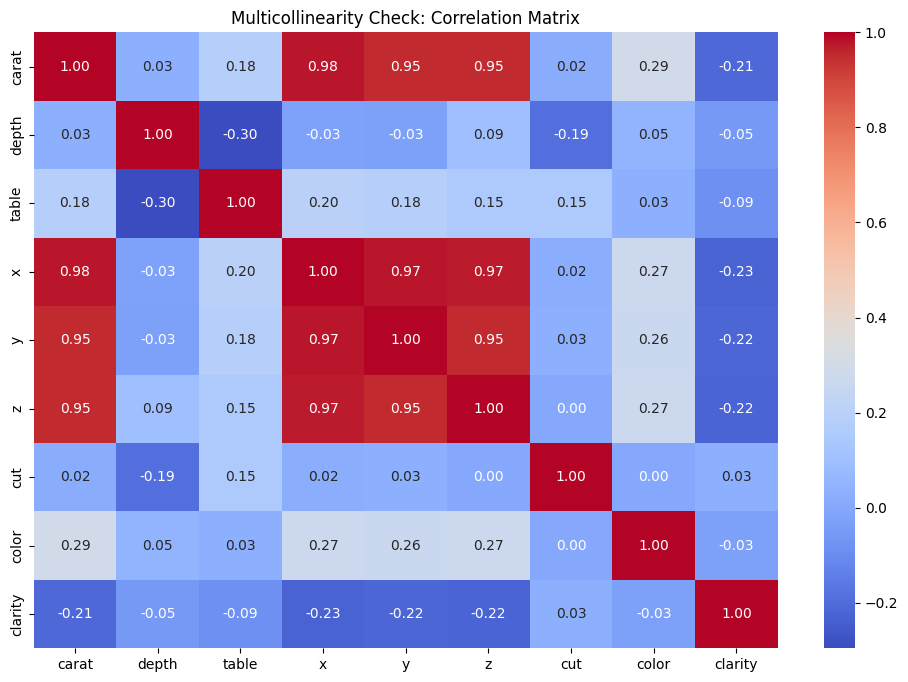

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Convert categorical features to numerical (e.g., 'cut', 'color', 'clarity')
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# 1. Linearity Check - Scatter Plot of one predictor vs target (e.g., 'carat' vs 'price')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['carat'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['carat'], y=y_pred, color='red', label='Predicted')
plt.title('Linearity Check: Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Homoscedasticity Check - Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.title('Homoscedasticity Check: Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Multicollinearity Check - Correlation Matrix
corr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multicollinearity Check: Correlation Matrix')
plt.show()


4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Convert categorical features to numerical (e.g., 'cut', 'color', 'clarity')
# We will use OneHotEncoder for categorical features instead of LabelEncoder
# 'cut', 'color', 'clarity' are categorical features

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor for feature scaling and missing value imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
         ['carat', 'depth', 'table', 'x', 'y', 'z']),
        ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')),
         ['cut', 'color', 'clarity'])
    ])

# Create a pipeline for each model
models = {
    'Linear Regression': make_pipeline(preprocessor, LinearRegression()),
    'Decision Tree': make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42)),
    'Random Forest': make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
}

# Evaluate models using cross-validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)
    rmse_cv_score = np.sqrt(-mean_cv_score)

    print(f"Mean Squared Error (MSE) (Cross-Validation): {-mean_cv_score:.2f}")
    print(f"Root Mean Squared Error (RMSE) (Cross-Validation): {rmse_cv_score:.2f}")

    # Fit the model on the training data and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate MSE and RMSE on the test set
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    print(f"Mean Squared Error (MSE) (Test Set): {mse_test:.2f}")
    print(f"Root Mean Squared Error (RMSE) (Test Set): {rmse_test:.2f}")
    print('-' * 50)



Evaluating Linear Regression...
Mean Squared Error (MSE) (Cross-Validation): 1277756.92
Root Mean Squared Error (RMSE) (Cross-Validation): 1130.38
Mean Squared Error (MSE) (Test Set): 1288705.48
Root Mean Squared Error (RMSE) (Test Set): 1135.21
--------------------------------------------------
Evaluating Decision Tree...
Mean Squared Error (MSE) (Cross-Validation): 565050.79
Root Mean Squared Error (RMSE) (Cross-Validation): 751.70
Mean Squared Error (MSE) (Test Set): 555391.14
Root Mean Squared Error (RMSE) (Test Set): 745.25
--------------------------------------------------
Evaluating Random Forest...


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [10]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'diamonds' dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# For simplicity, let's predict 'price' using 'carat' as the independent variable
X = diamonds[['carat']]  # Independent variable (predictor)
y = diamonds['price']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared Score (Test Set): {r2_score(y_test, y_pred)}")


Model Coefficients: [7768.91049036]
Model Intercept: -2261.9117456492177
R-squared Score (Test Set): 0.8489390686155808


6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

Model Coefficients: [0.10696371]
Model Intercept: 0.925235558557056
R-squared Score (Test Set): 0.5449381659234664


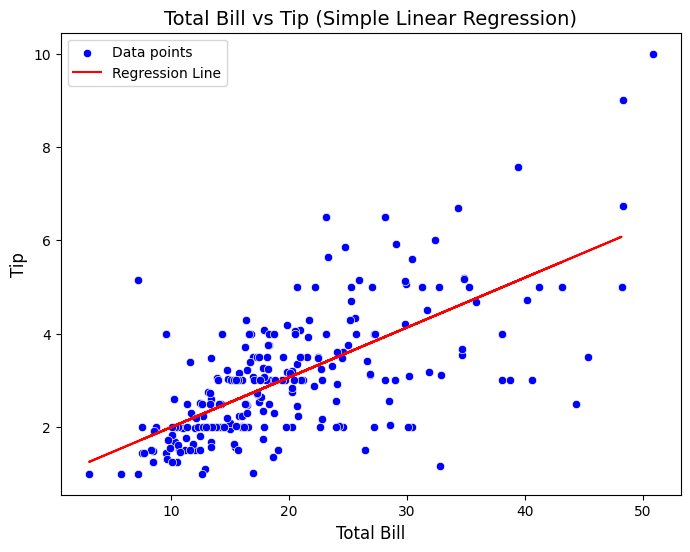

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')

# Select 'total_bill' as the independent variable (predictor) and 'tip' as the dependent variable (target)
X = tips[['total_bill']]  # Independent variable (predictor)
y = tips['tip']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared Score (Test Set): {r2_score(y_test, y_pred)}")

# Visualize the data points and the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.title('Total Bill vs Tip (Simple Linear Regression)', fontsize=14)
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.legend()

# Show the plot
plt.show()


7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

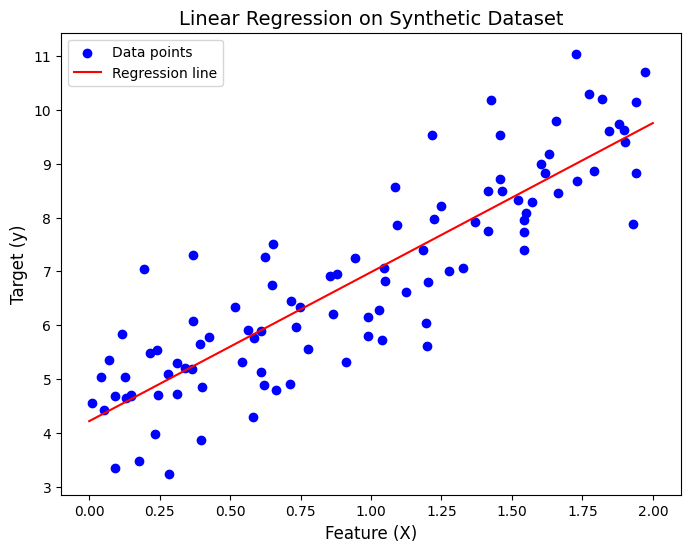

Model Coefficients: [[2.77011339]]
Model Intercept: [4.21509616]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate random data points (feature)
X = 2 * np.random.rand(100, 1)  # 100 data points, feature values between 0 and 2

# Create a linear relationship (y = 4 + 3 * X + noise)
y = 4 + 3 * X + np.random.randn(100, 1)  # Adding some noise

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict new values
X_new = np.array([[0], [2]])  # Predict for new values of X (0 and 2)
y_predict = model.predict(X_new)

# Step 4: Plot the data points and regression line
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X_new, y_predict, color='red', label='Regression line')

# Adding labels and title
plt.title('Linear Regression on Synthetic Dataset', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [13]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate random data points (feature)
X = 2 * np.random.rand(100, 1)  # 100 data points, feature values between 0 and 2

# Create a linear relationship (y = 4 + 3 * X + noise)
y = 4 + 3 * X + np.random.randn(100, 1)  # Adding some noise

# Step 2: Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Pickle the trained model and save it to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved to 'linear_regression_model.pkl'")


Model has been pickled and saved to 'linear_regression_model.pkl'


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

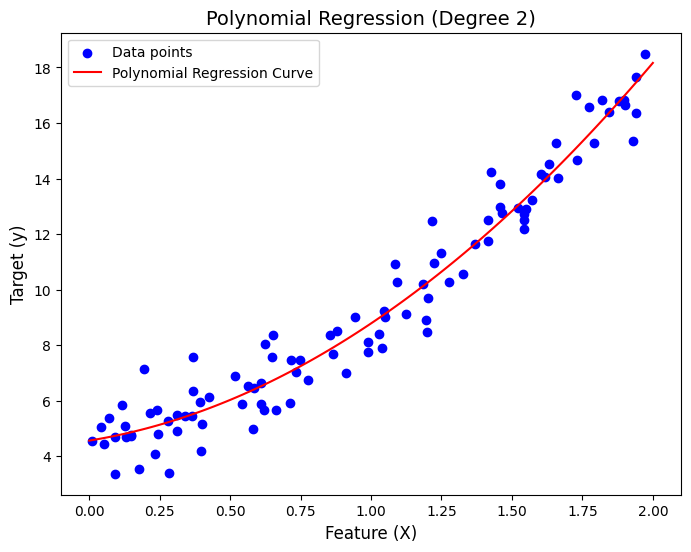

Model Coefficients: [[0.         1.63887939 2.5810637 ]]
Model Intercept: [4.56140272]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate random data points (feature)
X = 2 * np.random.rand(100, 1)  # 100 data points, feature values between 0 and 2

# Create a quadratic relationship (y = 4 + 3 * X + 2 * X^2 + noise)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Adding some noise

# Step 2: Transform the feature to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transforms X to [1, X, X^2]

# Step 3: Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict new values for plotting the regression curve
X_range = np.linspace(0, 2, 100).reshape(-1, 1)  # Create a range of values for X
X_range_poly = poly.transform(X_range)  # Transform these values to polynomial features
y_range_pred = model.predict(X_range_poly)  # Predict the corresponding y values

# Step 5: Plot the data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')

# Adding labels and title
plt.title('Polynomial Regression (Degree 2)', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for simple linear regression
np.random.seed(42)  # For reproducibility

# Generate random values for X (100 data points)
X = 2 * np.random.rand(100, 1)  # Feature values between 0 and 2

# Generate random values for y (target) based on a linear relationship y = 4 + 3 * X + noise
y = 4 + 3 * X + np.random.randn(100, 1)  # Adding some noise to the data

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficient and intercept
print(f"Model Coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficient: [[2.77011339]]
Model Intercept: [4.21509616]


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

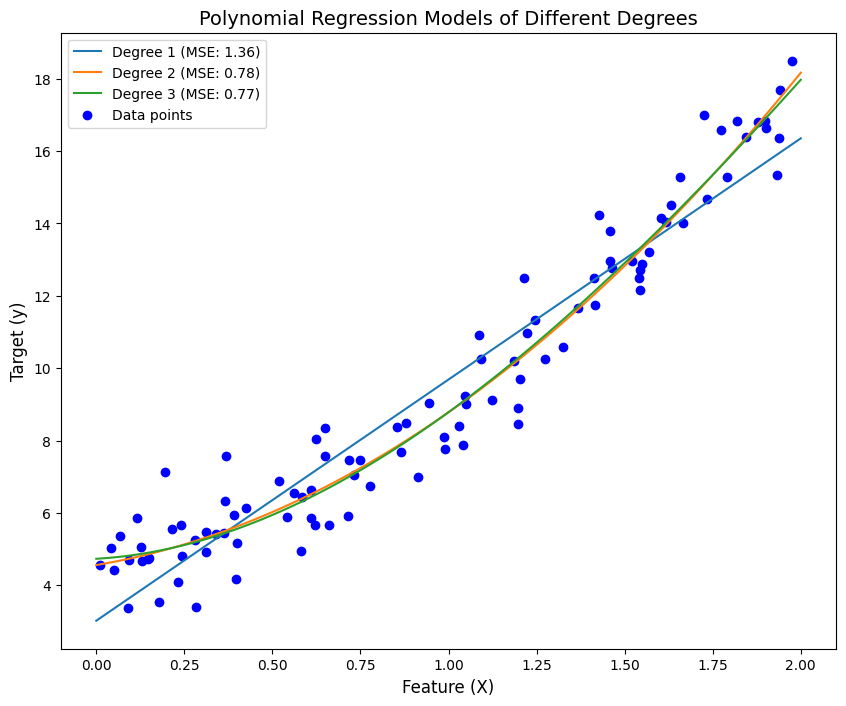

Degree 1 - MSE: 1.36
Degree 2 - MSE: 0.78
Degree 3 - MSE: 0.77


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic dataset
np.random.seed(42)  # For reproducibility

# Generate random data points (feature)
X = 2 * np.random.rand(100, 1)  # 100 data points, feature values between 0 and 2

# Create a quadratic relationship (y = 4 + 3 * X + 2 * X^2 + noise)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Adding some noise

# Step 2: Initialize models for different degrees of polynomial regression
degrees = [1, 2, 3]  # Polynomial degrees to test
models = []
mse_scores = []

# Step 3: Fit polynomial regression models for each degree
plt.figure(figsize=(10, 8))

for degree in degrees:
    # Transform the feature to polynomial features of the given degree
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict the target values
    y_pred = model.predict(X_poly)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)

    # Plot the polynomial regression curve
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, label=f'Degree {degree} (MSE: {mse:.2f})')

# Step 4: Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Adding labels and title
plt.title('Polynomial Regression Models of Different Degrees', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Step 5: Print MSE scores for each degree
for degree, mse in zip(degrees, mse_scores):
    print(f"Degree {degree} - MSE: {mse:.2f}")


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with two features
np.random.seed(42)  # For reproducibility

# Generate random values for two features (X1, X2)
X = 2 * np.random.rand(100, 2)  # 100 data points, each with two features (X1, X2)

# Generate target values (y) based on a linear relationship with noise
# y = 4 + 3 * X1 + 2 * X2 + noise
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Calculate R-squared score
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
print(f"R-squared Score: {r_squared:.4f}")


Model Coefficients: [3.16933339 2.17747302]
Model Intercept: 3.772272264101705
R-squared Score: 0.8376


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

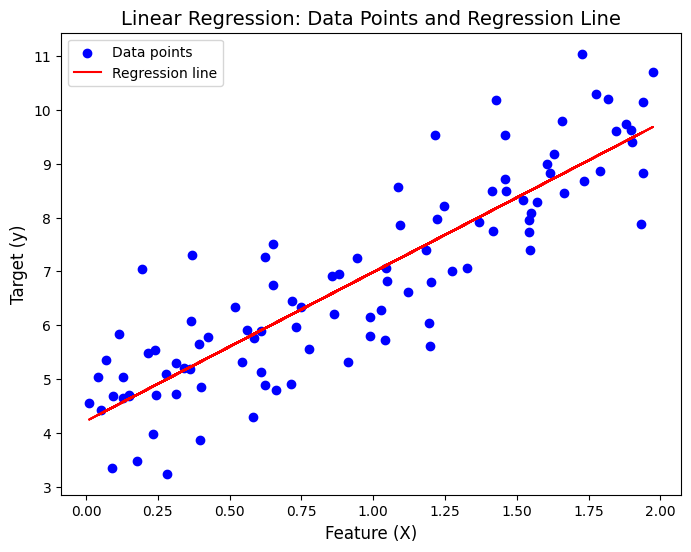

Model Coefficient: [2.77011339]
Model Intercept: [4.21509616]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility

# Generate random values for X (feature)
X = 2 * np.random.rand(100, 1)  # 100 data points, feature values between 0 and 2

# Generate corresponding y values based on a linear relationship (y = 4 + 3 * X + noise)
y = 4 + 3 * X + np.random.randn(100, 1)  # Adding some noise to the data

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict the target values using the fitted model
y_pred = model.predict(X)

# Step 4: Visualize the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Plot regression line
plt.title('Linear Regression: Data Points and Regression Line', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.show()

# Print model's coefficients and intercept
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [20]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Load a sample dataset (you can replace this with your own dataset)
# For demonstration, we'll use the 'iris' dataset available in sklearn

from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Add a constant column to the features for calculating VIF (intercept term)
X_const = add_constant(X)

# Step 3: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Step 4: Print the VIF values
print(vif_data)

# Step 5: Interpretation
# A VIF value greater than 10 indicates high multicollinearity.


             Feature         VIF
0              const  131.113086
1  sepal length (cm)    7.072722
2   sepal width (cm)    2.100872
3  petal length (cm)   31.261498
4   petal width (cm)   16.090175


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

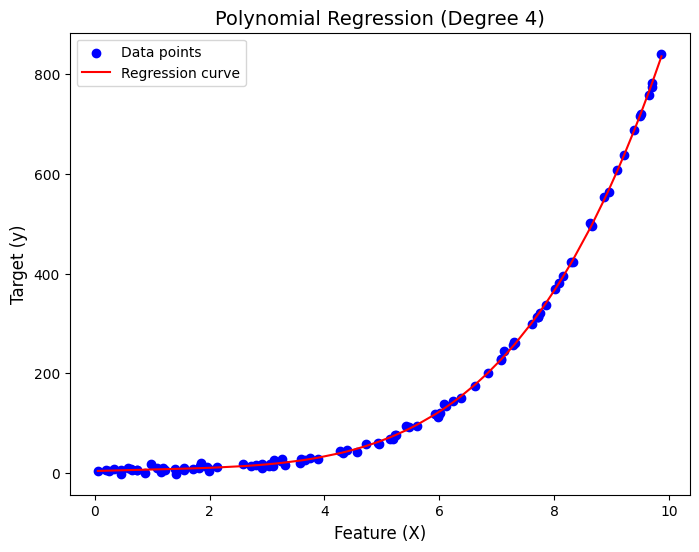

Model Intercept: [4.22562108]
Model Coefficients: [[ 0.          3.4308039  -0.41699894 -0.01328925  0.08967444]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data with a polynomial relationship (degree 4)
np.random.seed(42)  # For reproducibility

# Generate random values for X (feature)
X = np.random.rand(100, 1) * 10  # 100 data points, feature values between 0 and 10

# Generate y values based on a polynomial relationship (degree 4)
# y = 2 + 3 * X + 0.5 * X^2 - 0.2 * X^3 + 0.1 * X^4 + noise
y = 2 + 3 * X + 0.5 * X**2 - 0.2 * X**3 + 0.1 * X**4 + np.random.randn(100, 1) * 5

# Step 2: Fit a polynomial regression model
# Transform the features to include polynomial terms (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit the linear regression model to the transformed features
model = LinearRegression()
model.fit(X_poly, y)

# Step 3: Predict y values using the fitted model
y_pred = model.predict(X_poly)

# Step 4: Plot the data points and the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot data points
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', label='Regression curve')  # Plot regression curve
plt.title('Polynomial Regression (Degree 4)', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.show()

# Print model's coefficients and intercept
print(f"Model Intercept: {model.intercept_}")
print(f"Model Coefficients: {model.coef_}")


16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Step 1: Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with data standardization and linear regression
pipeline = make_pipeline(
    StandardScaler(),  # Data standardization
    LinearRegression()  # Linear regression model
)

# Step 4: Fit the model to the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 6: Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.5758


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate a synthetic dataset with 5 features
np.random.seed(42)  # For reproducibility

# Generate random feature values (X) with 100 data points and 5 features
X = np.random.rand(100, 5) * 10  # Features between 0 and 10

# Generate target values (y) with a linear relationship to X
# y = 2 + 3 * X1 + 0.5 * X2 - 1.2 * X3 + 0.7 * X4 + 1.5 * X5 + noise
y = 2 + 3 * X[:, 0] + 0.5 * X[:, 1] - 1.2 * X[:, 2] + 0.7 * X[:, 3] + 1.5 * X[:, 4] + np.random.randn(100) * 2

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Perform multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 6: Print the model's coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


R-squared score: 0.9663
Model Coefficients: [ 2.93059173  0.45321533 -1.07041934  0.72911692  1.41087197]
Model Intercept: 2.291969487973983


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

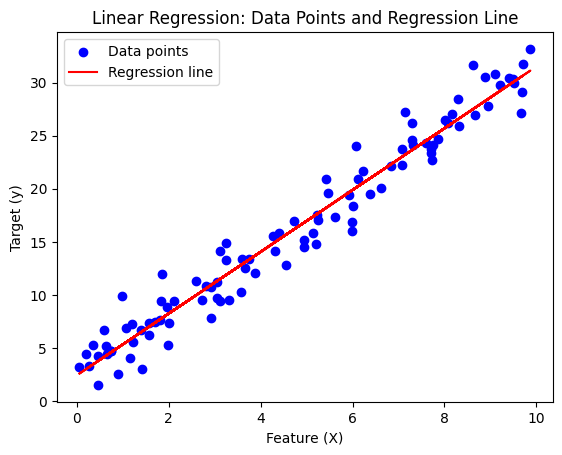

Model Coefficient: 2.9080453545753935
Model Intercept: 2.4301923150934943


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility

# Generate random feature values (X) with 100 data points
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10

# Generate target values (y) with a linear relationship to X
# y = 2 + 3 * X + noise
y = 2 + 3 * X + np.random.randn(100, 1) * 2  # Adding some noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions using the model
y_pred = model.predict(X)

# Step 4: Visualize the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of the data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Plot the regression line
plt.title('Linear Regression: Data Points and Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient: {model.coef_[0][0]}")
print(f"Model Intercept: {model.intercept_[0]}")


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate a synthetic dataset with 3 features
np.random.seed(42)  # For reproducibility

# Generate random feature values (X) with 100 data points and 3 features
X = np.random.rand(100, 3) * 10  # Features between 0 and 10

# Generate target values (y) with a linear relationship to X
# y = 5 + 2 * X1 + 0.5 * X2 - 1.5 * X3 + noise
y = 5 + 2 * X[:, 0] + 0.5 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(100) * 2

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Perform multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 6: Print the model's coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


R-squared score: 0.8737
Model Coefficients: [ 2.02117953  0.4849212  -1.36278815]
Model Intercept: 4.829979116734156


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Step 1: Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility

# Generate random feature values (X) with 100 data points and 3 features
X = np.random.rand(100, 3) * 10  # Features between 0 and 10

# Generate target values (y) with a linear relationship to X
# y = 5 + 2 * X1 + 0.5 * X2 - 1.5 * X3 + noise
y = 5 + 2 * X[:, 0] + 0.5 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(100) * 2

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Serialize (save) the model using joblib
joblib.dump(model, 'linear_regression_model.joblib')
print("Model saved using joblib.")

# Step 5: Deserialize (load) the model using joblib
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model loaded using joblib.")

# Step 6: Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Step 7: Print the R-squared score of the loaded model
r2_score = loaded_model.score(X_test, y_test)
print(f"R-squared score of the loaded model: {r2_score:.4f}")


Model saved using joblib.
Model loaded using joblib.
R-squared score of the loaded model: 0.8737


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [30]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load the Seaborn 'tips' dataset
tips = sns.load_dataset('tips')

# Step 2: Perform one-hot encoding on categorical features
# We'll encode 'sex', 'smoker', 'day', and 'time' columns
tips_encoded = pd.get_dummies(tips, drop_first=True)

# Step 3: Define the features (X) and target (y)
X = tips_encoded.drop('tip', axis=1)  # Drop the target variable
y = tips_encoded['tip']  # The target variable is 'tip'

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Step 8: Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared score: 0.4373
Model Coefficients: [ 0.09469974  0.23348393 -0.02881928  0.19235325  0.17972098 -0.00606432
  0.12892759 -0.09495716]
Model Intercept: 0.4791179104407939


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility

# Generate random feature values (X) with 100 data points and 5 features
X = np.random.rand(100, 5) * 10  # Features between 0 and 10

# Generate target values (y) with a linear relationship to X
# y = 3 + 2 * X1 + 0.5 * X2 - 1.5 * X3 + 0.3 * X4 - 2 * X5 + noise
y = 3 + 2 * X[:, 0] + 0.5 * X[:, 1] - 1.5 * X[:, 2] + 0.3 * X[:, 3] - 2 * X[:, 4] + np.random.randn(100) * 2

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 4: Train Ridge Regression model (with alpha = 1.0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Calculate R-squared scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 7: Print the R-squared scores and coefficients
print(f"Linear Regression R-squared score: {r2_linear:.4f}")
print(f"Ridge Regression R-squared score: {r2_ridge:.4f}")

print("\nLinear Regression Coefficients:")
print(linear_model.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_model.coef_)


Linear Regression R-squared score: 0.9524
Ridge Regression R-squared score: 0.9524

Linear Regression Coefficients:
[ 1.93059173  0.45321533 -1.37041934  0.32911692 -2.08912803]

Ridge Regression Coefficients:
[ 1.92838447  0.45244586 -1.36883512  0.32862349 -2.08652357]


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
datase

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Step 2: Create a Linear Regression model
model = LinearRegression()

# Step 3: Perform cross-validation
# We use 5-fold cross-validation and evaluate the R-squared score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Step 4: Print the cross-validation scores and the mean R-squared score
print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score:", np.mean(cv_scores))


Cross-validation R-squared scores: [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score: 0.9999993197756156


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

Degree 1 Polynomial Regression R-squared score: 0.8228
Degree 2 Polynomial Regression R-squared score: 0.9805
Degree 3 Polynomial Regression R-squared score: 0.9864


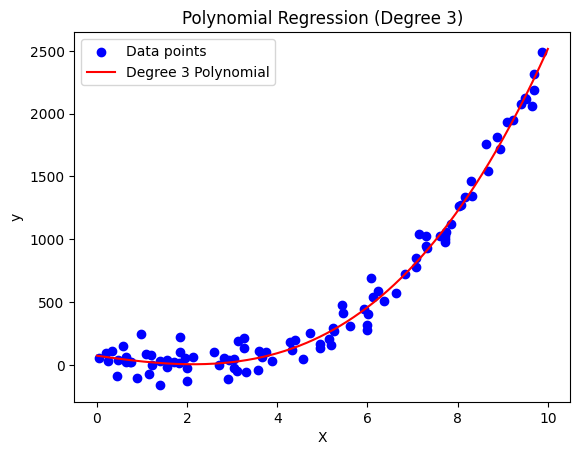

Degree 4 Polynomial Regression R-squared score: 0.9854
Degree 5 Polynomial Regression R-squared score: 0.9854


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)

# Generate random feature values (X) with 100 data points
X = np.random.rand(100, 1) * 10  # Feature between 0 and 10

# Generate target values (y) with a polynomial relationship to X
y = 3 * X**3 - 5 * X**2 + 2 * X + np.random.randn(100, 1) * 100  # Polynomial with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Compare polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # Step 3a: Create polynomial features for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Step 3b: Train a linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Step 3c: Make predictions
    y_pred = model.predict(X_poly_test)

    # Step 3d: Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Step 3e: Print the R-squared score for the current degree
    print(f"Degree {degree} Polynomial Regression R-squared score: {r2:.4f}")

    # Optional: Plot the regression curve for each degree
    if degree == 3:  # Plot for degree 3 as an example
        plt.scatter(X, y, color='blue', label='Data points')
        X_range = np.linspace(0, 10, 1000).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range = model.predict(X_range_poly)
        plt.plot(X_range, y_range, label=f'Degree {degree} Polynomial', color='red')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Polynomial Regression (Degree 3)')
        plt.legend()
        plt.show()
